# Random Forests

This is a standby method for me,  since it is very easy to run and produces pretty high performance results quickly

A random forest is an ensemble of many trees.   Remember that we can use trees for classification or for regression,   the same basic algorithm handles both situations
easily.

We know that trees are highly prone to overfitting, so averaging over many trees may help greatly to control overfitting.    Ensemble methods may really help in this
case.

The other issue with trees is that we are using an optimality algorithm that is guaranteed to find the best splitting point at each individual split point in the tree.  
However if there is a lot of correlation in the predictors,   we don't know what the other possible "good" trees look like.   Minor changes at each branch might also give
us pretty good trees.

Note that when we say "best tree at each splitting point" it really means "the best tree that fits the training data",   it might not be the best tree for the
cross validation data, or the test data or new data that comes into our business.  

In practice, we need to limit the complexity of a tree to keep it from overfitting.   The tree that is most closely matched to the training data is probably not the
best for predicting results for new data.   We need to use a simpler tree,  or the average over many complicated trees.    The idea here is to generate a bunch of
slightly different trees, that make use of different combinations of the predictors and then average over them.


Sources-

See Chapter 7 of "Hands-On Machine Learning with Scikit-Learn,  Keras and TensorFlow, 2nd Edition" by Geron,   published by O'Reilly

Also see the scikit learn website

## Bagging

The random forest model uses a tactic called "Bagging" which stands for Bootstrap Aggregation

There are a number of ways to carry out a bootstrapping resampling of a data set.

In a bootstrapping of specimens or individuals (rows in a data frame),   we randomly pick N rows out of a data frame.

This is called sampling.   We can do sampling "without replacement" in which each row can appear only once in the boostrap set.    If we sample 100 rows out of 1000,
each resampled set will be slightly different.   Note that if we sample 1000 out of 1000 rows,  each set will be identical,  so you have to think about how large the
bootstrap set will be.

We can also sample "with replacement",  which means that each row can appear more than once,  or not at all,  in the resampled set.  Resampling with replacement can be
used to produce resampled sets the same size as the original set, which will be different from the original sets.    In a way,  resampling with replacement is like
fitting a model with different and variable weights on each specimen.   Some specimens have double or triple (or more) weighting,  while others have zero weight.

Bootstrapping with replacement generally works better than without replacment.    A bootstrap aggregration without replacement is called "pasting"

Note that it is also possible to bootstrap variables (columns of a data frame) instead of bootstrapping specimens (rows).    We could again either use sampling with
or without replacement

Be aware of what is being bootstrapped,  specimens (rows) or columns (variables).

## Bagging methods in Scikit Learn

Scikit learn has an API for Bagging, with the BaggingClassifier and the BaggingRegressor

The BaggingClassifier will use soft voting (based on probabilities) if the classification method used predicts probabilities

The BaggingClassifier and BaggingRegressor will by default using Bootstrap Resampling of the specimens,  with the number of specimens used a control parameter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will use the banknote data from last week,  detecting falsified banknotes
This came from the UCI data repository

Columns of the data frame

variance of Wavelet Transformed image (continuous). skewness of Wavelet Transformed image (continuous). kurtosis of Wavelet Transformed image (continuous). entropy of image (continuous). class (integer).

The cell below is the data import when running the notebook on a local machine, farther down is the instruction for loading from a google drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Change your infile value
# get the bank note data set from the UCI Repository

infile="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/data_banknote_authentication.txt"

bnote=pd.read_csv(infile,header=None)

bnote.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Loading data stored on your Google drive

This is the easiest way to get "external" data into Python code running on colab

Load your data set into your google drive- I made a folder on Google Drive to store my files for DAT 514, and put the data file in that directory

We will then mount your Google drive onto Colab,  it will ask for permission to access your files

In [ ]:
path = "/content/drive/MyDrive/DAT514_data/data_banknote_authentication.txt"

bnote=pd.read_csv(path,header=None)

bnote.head()


,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Now we have the usual setup steps

-split the data into the predictors X and target y

-do a train-test split

In [5]:
bnote.columns=['VarWavelet','SkewWavelet','KurWavelet','entropy','class']

In [7]:
bnote.head()

,VarWavelet,SkewWavelet,KurWavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
X=bnote.iloc[:,0:4]
y=bnote.iloc[:,4]

In [9]:
X.head(2)

,VarWavelet,SkewWavelet,KurWavelet,entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
# Now, set up a bagging classifier using a decision tree classifier

# Note that you could use different types of classifying models within the Bagging API

# Note that the input to the Bagging Classifier are

#     -a classifier
#     -the number of classifiers to use,   500 trees in this case
#     - max samples- the number of specimens (rows) to use to train each tree
#     -bootstrap=True means this is sampling with replacement


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [13]:
my_acc=sum(y_pred==y_test)/y_test.size

In [14]:
my_acc

0.9636363636363636

# Question/Action

How many hyperparameters are there in the BaggingClassifier function?

List what these hyperparametes are

The process shown above, uses the DecisionTreeClassifier within the Bagging process.    How many hyperparameters
are there within the DecisionTreeClassifer?   What does this mean about the Hyperparameter tuning process here

### Answer:
BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

- BaggingClassifier has 11 hyperparameters

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
- 13 types of hyperparameters



This tells us that there is many methods of variation and tune to the trees in the random forest

In [15]:
# lets alter the number of specimens used in training

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=300, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print (sum(y_pred==y_test)/y_test.size)

0.9927272727272727


### Hmm, that's interesting,   upping the max_samples used improved matters more than I would have expected

In [16]:
# There are parameters with DecisionTreeClassifier

# let's try changing the criterion to "entropy"
# and the min_samples_split to 4,   the default used is 4
# (the first time I ran this, the entropy choice didn't alter anything)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(criterion="entropy",min_samples_split=4), n_estimators=500,
    max_samples=300, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print (sum(y_pred==y_test)/y_test.size)


0.9927272727272727


In [ ]:
### for comparison purposes,  how does a logistic regression work

In [22]:
from sklearn.linear_model import LogisticRegression

myLogReg=LogisticRegression()
myLogReg.fit(X_train,y_train)

y_pred2=myLogReg.predict(X_test)

print (sum(y_pred2==y_test)/y_test.size)

0.9854545454545455


## Question/Action

Bag a logistic regression model,  just like we did with the Decision Tree Classifier.

What kind of performance can you get out of the Bagged Logistic regression?

In [25]:

bag_log = BaggingClassifier(LogisticRegression(), n_estimators=500,
                            max_samples=300, bootstrap=True, n_jobs=-1)

bag_log.fit(X_train, y_train)

y_pred2 = bag_log.predict(X_test)

print (sum(y_pred2==y_test)/y_test.size)

0.9854545454545455


### This is not a great data set to look at,   the ability to classify here is so high that we can't see much in terms of performance changes

## Out-of-Bag Evaluation (OOB)

In the Bagging process, we are using bootstrapping with replacement.   

If the sample size in the bootstrapping process is equal to the size of the data set, then it turns out that 1/3 of the specimens will be omitted (the remaining 2/3 will be sampled at least once, many of them more than once).

The 1/3 of specimens not in the bootstrap set are called Out of Bag specimens, and we can use them lik a validation set to test the performance

we can turn on the OOB estimation

In [26]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(min_samples_split=4), n_estimators=500,
    max_samples=300, bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print (sum(y_pred==y_test)/y_test.size)

print()
print(bag_clf.oob_score_)

0.9890909090909091

0.9826800364630811


# Sampling Features

It is also possible to sample features as well as specimens within the BaggingClassifier and BaggingRegressor

Here, we are using a set off 100 2 feature trees.

I'm a bit surprised this works at all,   2 features is really limited.

This would be far more interesting with more features

In [27]:
bag_clf2 = BaggingClassifier(
    DecisionTreeClassifier(min_samples_split=4), n_estimators=100,
    max_features=2, bootstrap_features=True, n_jobs=-1,)
bag_clf2.fit(X_train, y_train)

y_pred2 = bag_clf2.predict(X_test)

print (sum(y_pred2==y_test)/y_test.size)

print()


0.9781818181818182



## Random Patches

We can sample both the features used and the the specimens,  at the same time.    Apparently this works well with images

For our example,  we only have 4 features, which is a bit limiting,  more would be better

In [28]:
bag_clf3 = BaggingClassifier(
    DecisionTreeClassifier(min_samples_split=4), n_estimators=500,
    max_samples=300, max_features=3, bootstrap=True, bootstrap_features=True, n_jobs=-1,oob_score=True)
bag_clf3.fit(X_train, y_train)

y_pred3 = bag_clf3.predict(X_test)

print (sum(y_pred3==y_test)/y_test.size)

print()
print(bag_clf.oob_score_)

0.9890909090909091

0.9826800364630811


### Paralleliztion

Since Bagging of various types requires creating variations on  the same model over and over and then carrying out a voting process,  bagging is an "embarrassingly parallel" process.

It is so easy to split the problem up into equal chunks and run it on multiple processors, that the algorithm is referred to as "embarassing"

## Random Forests

A random forest is a just a set of bagged trees,  we could do it using the decision tree and bagging classifier as above, but Scikit learn and many other tools
offer a self-contained RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print (sum(y_pred_rf==y_test)/y_test.size)


0.9745454545454545


## Question/Action

Look up the RandomForestClassifier in the Scikit learn manuals

-Run a RF classifier with an oob estimate of classification and show the results

-try running it with max features set to 3 and 4,  which does better in oob classification?

-try a trial altering max samples

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1, oob_score = True)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(sum(y_pred_rf==y_test)/y_test.size)

print(rnd_clf.oob_score_)

0.9745454545454545
0.9708295350957156


# Extra Trees

In an extra tree, we will use some random threshold values in the tree,  rather than the optimal values

We are essentially deliberately degrading the performance of each tree slightly by adding in some random choices,  in an effort to improve
the robustness of the forest.

These are called Extremely Randomized Trees (or Extra Trees)



In [35]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
extra_clf.fit(X_train, y_train)

y_pred_extra = extra_clf.predict(X_test)

print (sum(y_pred_extra==y_test)/y_test.size)

0.9672727272727273


## Look up the Extra Tree Classifier in SciKit learn

What hyperparameters can you adjust to alter it's behavior?

Can you get oob estimates?  If so, run the extra tree system with OOB estimates


class sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

- You can get oob estimates

In [39]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1, bootstrap=True, oob_score=True)
extra_clf.fit(X_train, y_train)

y_pred_extra = extra_clf.predict(X_test)

print (sum(y_pred_extra==y_test)/y_test.size)
print(extra_clf.oob_score_)

0.9745454545454545
0.9717411121239745


## Feature Importance

There is a relative easy way to look at feature importance in Random Forests (or Extra trees)

What we can do is count the percentage of nodes in the entire forest that use a particular variable (or feature if you prefer)

This is pretty straightforward

In [40]:
# importance for our data and the random forest

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print (sum(y_pred_rf==y_test)/y_test.size)

print("-----------------------------------------------")
for name, score in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, score)

0.9745454545454545
-----------------------------------------------
VarWavelet 0.5883176661937494
SkewWavelet 0.2335737550739053
KurWavelet 0.13330223557846677
entropy 0.04480634315387857


In [41]:
X_train.columns[0]

'VarWavelet'

In [42]:
# importance in the random forest

extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
extra_clf.fit(X_train, y_train)

y_pred_extra = extra_clf.predict(X_test)

print (sum(y_pred_extra==y_test)/y_test.size)

for name, score in zip(X_train.columns, extra_clf.feature_importances_):
    print(name, score)

0.9709090909090909
VarWavelet 0.5967206711671106
SkewWavelet 0.28692947768643057
KurWavelet 0.08419535035288779
entropy 0.032154500793571114


## Comparisons with ELI5 results and Shap

In [43]:
#looks like we need to install Eli5 manually

!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=6169e601cb56a3eeefdec80a27d622412b97c580f2fcd56b1e76b94cae4aaed7
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [44]:
import eli5
from eli5.sklearn import PermutationImportance

In [45]:
perm = PermutationImportance(rnd_clf, random_state=1).fit(X_train, y_train)

In [46]:
eli5.show_weights(perm, feature_names = ['VarWavelet','SkewWavelet','KurWavelet','entropy'])

Weight,Feature
0.3201 ± 0.0141,VarWavelet
0.1716 ± 0.0111,SkewWavelet
0.0563 ± 0.0065,KurWavelet
0.0002 ± 0.0007,entropy


In [47]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.1 MB/s eta 0:00:00


In [48]:
import shap

In [49]:
X_train.columns=['VarWavelet','SkewWavelet','KurWavelet','entropy']

In [50]:
# Shap continues to be kind of frustrating and annoying, but when it works,  it gives such nice explanations.  Dang.

explainer = shap.TreeExplainer(rnd_clf,X_train)

In [51]:
shap_values = explainer.shap_values(X_test)

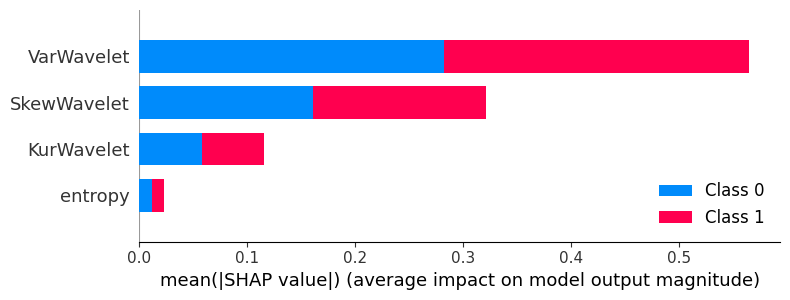

In [52]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,X_test,feature_names=['VarWavelet','SkewWavelet','KurWavelet','entropy'])